In [14]:
from sklearn import decomposition
from display import Display

import numpy as np
import matplotlib.pyplot as plt
import pickle

In [15]:
display = Display(180, 320)

In [16]:
n_row, n_col = 4, 7
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2.*3 * n_col, 1.5*3 * n_row))
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(comp)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.01, 0.99, 0.99, 0.05, 0.)

In [17]:
with open('./dataset/processed_eye_motion_dataset.pickle', 'rb') as f:
    data = pickle.load(f)
    estimator = data['estimator']
    var_ratio = estimator.explained_variance_ratio_
print('[INFO] {} number of components explain {:0.2f} of original dataset.'.format(estimator.n_components, np.sum(var_ratio)))
print('[INFO] Without first and seconde axis, rest of hyperplain consists of {:0.2f} of original dataset.'.format(np.sum(var_ratio[3:])))

[INFO] 7 number of components explain 0.96 of original dataset.
[INFO] Without first and seconde axis, rest of hyperplain consists of 0.13 of original dataset.


In [18]:
n_components = estimator.n_components
mean_expression = np.array([0]*n_components)
m_0 = np.diag([4]*n_components)
m_1 = np.diag([2]*n_components)
m_2 = np.diag([-2]*n_components)
m_3 = np.diag([-4]*n_components)
pca_subspace = np.concatenate((m_0, m_1, m_2, m_3), axis=0)
pca_subspace

array([[ 4,  0,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  4],
       [ 2,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  2],
       [-2,  0,  0,  0,  0,  0,  0],
       [ 0, -2,  0,  0,  0,  0,  0],
       [ 0,  0, -2,  0,  0,  0,  0],
       [ 0,  0,  0, -2,  0,  0,  0],
       [ 0,  0,  0,  0, -2,  0,  0],
       [ 0,  0,  0,  0,  0, -2,  0],
       [ 0,  0,  0,  0,  0,  0, -2],
       [-4,  0,  0,  0,  0,  0,  0],
       [ 0, -4,  0,  0,  0,  0,  0],
       [ 0,  0, -4,  0,  0,  0,  0],
       [ 0,  0,  0, -4,  0,  0,  0],
       [ 0,  0,  0,  0, -4,  0,  0],
       [ 0,  0,  0,  0,  0, -4,  0],
 

In [19]:
subspace = estimator.inverse_transform(pca_subspace)
subspace.shape

(28, 48)

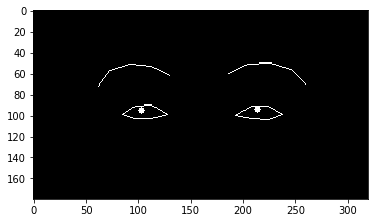

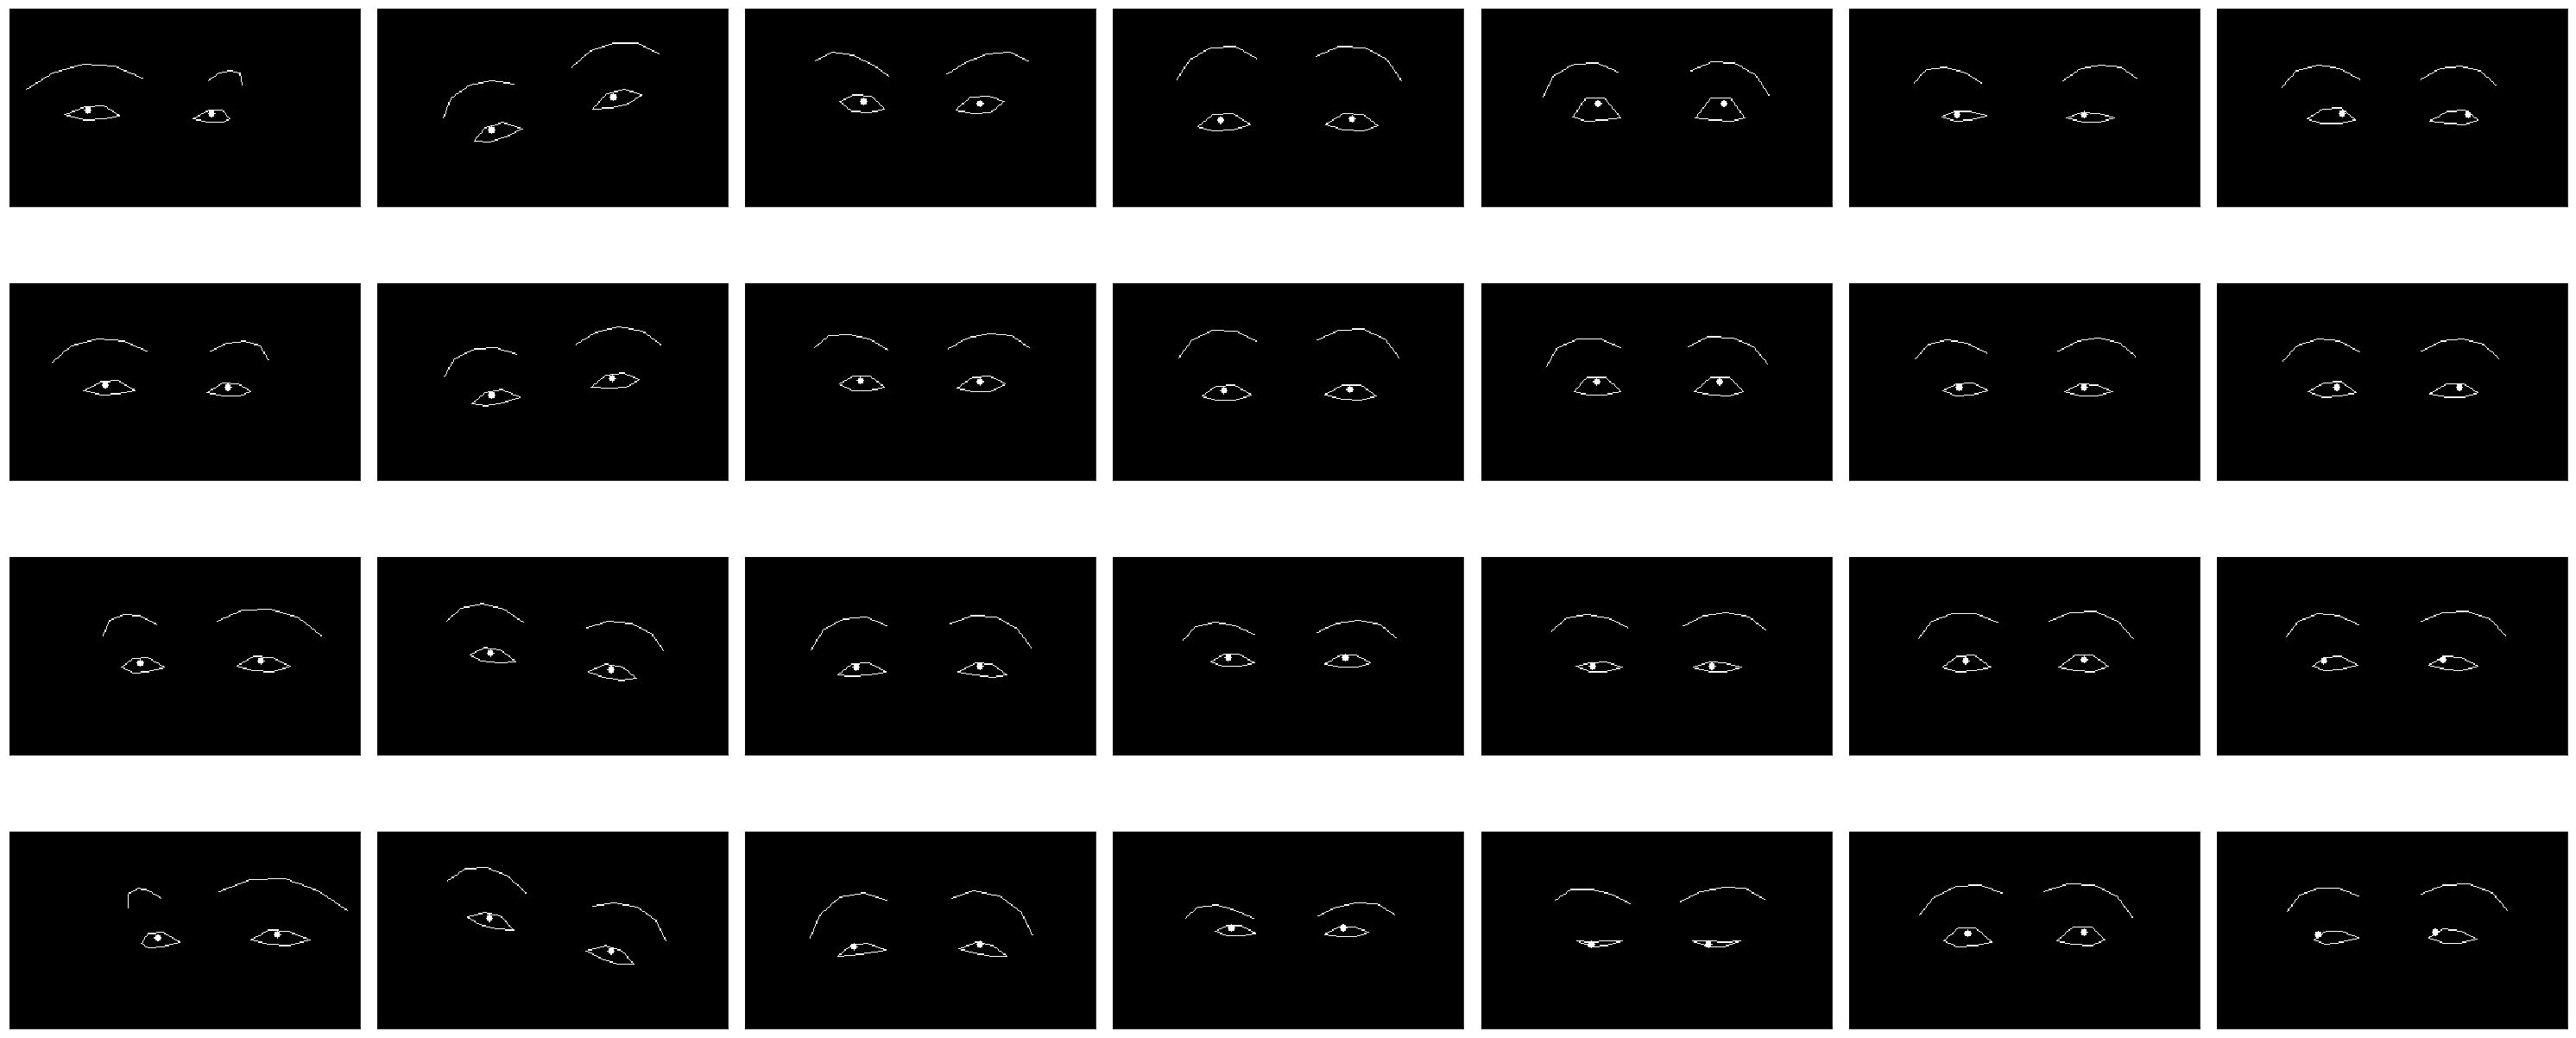

In [20]:
# mean expression
mean = estimator.inverse_transform(mean_expression)
mean = [int(o) for o in list(mean)]
# pca subspace expression
images = []
for space in subspace:
    inversed = [int(s) for s in space]
    img = display.draw_frame(inversed, False)
    images.append(img)

plt.imshow(display.draw_frame(mean, False))
plot_gallery('PCA_subspace', images)
plt.show()

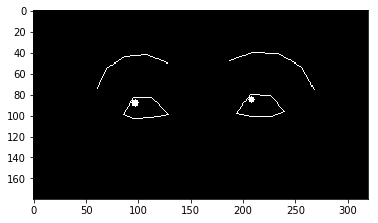

In [20]:
# sample = [-0.07821591236234299, 0.20747348878496788, -0.8870684604534096, -0.34685784939808373, -0.8311870356084051, -1.0195852524805507, -1.2879923222780936]
sample = [0,0,1,1,3,1,-4]
sample = estimator.inverse_transform(np.array(sample))
sample = [int(s) for s in list(sample)]

plt.imshow(display.draw_frame(sample, False))
plt.show()

# 7차원 벡터를 ...

#샘플들을 다이나믹스를 한 그래프로 표현할수 있도록...